#  K-Nearest Neighbors Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Churn_prediction_cleaned.csv')
data.head(10)

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_female,gender_male
0,1,3135.000000,66,0.0,0,187.000000,2,755.000000,69.997814,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1
1,2,310.000000,35,0.0,0,796.109576,2,925.975019,60.000000,5390.37,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1
2,4,2356.000000,31,0.0,1,146.000000,2,41.000000,69.997814,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1
3,5,478.000000,90,0.0,0,1020.000000,2,582.000000,147.000000,2291.91,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1
4,6,2531.000000,42,2.0,0,1494.000000,3,388.000000,58.000000,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1
5,7,263.000000,42,0.0,0,1096.000000,2,1666.000000,60.000000,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,1,0
6,8,2364.336446,72,0.0,3,1020.000000,1,1.000000,98.000000,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,0,1
7,9,1145.000000,46,0.0,0,623.000000,2,317.000000,69.997814,10096.58,...,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,0,1
8,10,2132.000000,31,0.0,1,1096.000000,2,925.975019,19.000000,1355.86,...,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,0,1
9,11,3379.000000,40,3.0,0,1020.000000,2,38.000000,0.000000,4957.95,...,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,0,1


In [3]:
data.shape

(28382, 22)

In [4]:
data.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
dependents                        float64
occupation                          int64
city                              float64
customer_nw_category                int64
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_female                       int64
gender_male                         int64
dtype: object

In [5]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
gender_female                     0
gender_male                       0
dtype: int64

### Segregate Variables:Independent And dependent Variables

In [6]:
x=data.drop('churn',axis=1)
y=data['churn']
x.shape,y.shape

((28382, 21), (28382,))

### Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [8]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [9]:
x.head()

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_female,gender_male
0,0.000000,0.555451,0.730337,0.000000,0.00,0.113402,0.5,0.279363,0.451599,0.001178,...,0.000005,0.003572,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000836,0.001158,0.0,1.0
1,0.000033,0.024436,0.382022,0.000000,0.00,0.482783,0.5,0.342710,0.387097,0.001843,...,0.001118,0.005754,4.482534e-08,2.328724e-07,7.182983e-04,7.110188e-05,0.001707,0.002438,0.0,1.0
2,0.000099,0.409023,0.337079,0.000000,0.25,0.088539,0.5,0.014820,0.451599,0.001593,...,0.000611,0.003844,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.001450,0.001789,0.0,1.0
3,0.000132,0.056015,1.000000,0.000000,0.00,0.618557,0.5,0.215265,0.948387,0.001319,...,0.000115,0.003484,3.749028e-08,1.947660e-07,6.022631e-08,1.515605e-03,0.000980,0.001195,0.0,1.0
4,0.000165,0.441917,0.460674,0.038462,0.00,0.906004,1.0,0.143386,0.374194,0.001088,...,0.000038,0.003656,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.000784,0.001196,0.0,1.0


### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split as tts

In [12]:
train1_x,test_x,train1_y,test_y=tts(x,y,test_size=0.2,random_state=56,stratify=y)

In [16]:
train_x,valid_x,train_y,valid_y=tts(train1_x,train1_y,test_size=0.2,random_state=50,stratify=train1_y)

### Importing KNN model for classification problem

In [18]:
from sklearn.neighbors import KNeighborsClassifier as KNN

### Elbow Method To Find The Optimal Value OF k

In [19]:
def elbow(k):
    k_error=[]
    
    for i in k:
        knn=KNN(n_neighbors=i)
        knn.fit(train1_x,train1_y)
        tmp=knn.score(test_x,test_y)
        temp=1-tmp
        k_error.append(temp)
      
    return k_error

In [20]:
#define the range for k

k=range(6,24,2)

In [21]:
#call the elbow function

test=elbow(k)
 

Text(0.5, 1.0, 'Elbow')

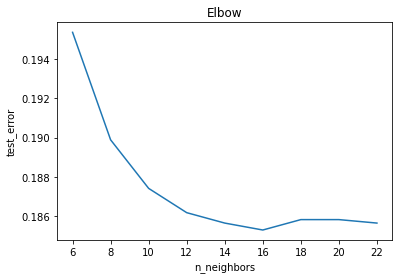

In [22]:
plt.plot(k,test)
plt.xlabel('n_neighbors')
plt.ylabel('test_error')
plt.title('Elbow')

In [27]:
knn=KNN(n_neighbors=16)
knn.fit(train1_x,train1_y)
train1_score=knn.score(train1_x,train1_y)
test_score=knn.score(test_x,test_y)
train_score=knn.score(train_x,train_y)
valid_score=knn.score(valid_x,valid_y)

train1_score,test_score,train_score,valid_score

(0.8150187183439771,
 0.8146908578474547,
 0.8149636643911032,
 0.8152389341554723)

### Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix as CM

In [31]:
cm1=CM(test_y,knn.predict(test_x))
cm1

array([[4623,    2],
       [1050,    2]], dtype=int64)

In [33]:
cm2=CM(valid_y,knn.predict(valid_x))
cm2

array([[3697,    2],
       [ 837,    5]], dtype=int64)

# Report

In [38]:
from sklearn.metrics import classification_report as report

In [39]:
test_report=report(test_y,knn.predict(test_x))
valid_report=report(valid_y,knn.predict(valid_x))

In [40]:
print(test_score)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      4625
           1       0.50      0.00      0.00      1052

    accuracy                           0.81      5677
   macro avg       0.66      0.50      0.45      5677
weighted avg       0.76      0.81      0.73      5677



In [41]:
print(valid_score)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3699
           1       0.71      0.01      0.01       842

    accuracy                           0.82      4541
   macro avg       0.76      0.50      0.45      4541
weighted avg       0.80      0.82      0.73      4541

